
✅ Accuracy: 0.7777777777777778

📊 Confusion Matrix:
 [[82 13]
 [19 30]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.70      0.61      0.65        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.77      0.78      0.77       144



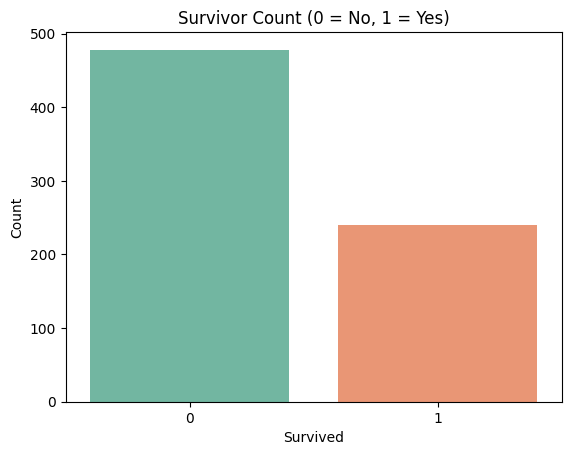

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load dataset
df = pd.read_csv("C:/Users/ANISHFATHIMA/OneDrive/Desktop/Titanic-Dataset.csv")

# Step 2: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Step 3: Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 4: Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Step 5: Feature scaling (standardization)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 6: Remove outliers using IQR
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Step 7: Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 10: Predict and evaluate
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 11 : Visualization
sns.countplot(data=df, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title("Survivor Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()
